### STUDENT PERFORMANCE INDICATOR 
#### Life Cycle of a Machine Learning Project 
- Understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analyis
- Data Pre-Processing
- Model Training 
- Choose most efficient model

### 1). Problem Statement 
- This project understanding hoe the student's performance (test scores) is affected by other variables such as Gender, Ethinicity, Parent education level, Lunch and Test preparation course.
### 2). Data Collection
- Dataset download: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
- Dataset consists of 8 rows and 1000 columns
#### 2.1 Import Data and Required Packages 
Importing pandas, numpy, matplotlib, seaborn, waring library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Dataset Information
- gender : Male/Female
- race/ethinicity: Group A,B,C,D,E
- parental level of education: bachelor's, some college, master's degree, associate degree, high school
- lunch: having lunch before test (standard, free/reduced)
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

### Data Checks to Perform
- Check missing value
- Check duplicates
- Check data types
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical column

In [4]:
#Checking for missing information
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
#Checking unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights 
- From above description of numerical data, all means are very close to each other 
- All standard deviation are also close
- While there is a minimum score 0 for math, for writing minimum is much higher

In [9]:
# Exploring categorical data
cat_vars = ['gender','race/ethnicity','parental level of education', 'lunch','test preparation course']
for vars in cat_vars:
    print('Categories in {0} variable'.format(vars), end = " ")
    print(df[vars].nunique())

Categories in gender variable 2
Categories in race/ethnicity variable 5
Categories in parental level of education variable 6
Categories in lunch variable 2
Categories in test preparation course variable 2


In [10]:
#defining numerical and acategorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Categorical Features: {}'.format(len(categorical_features)))
print('Numerical Features: {}'.format(len(numerical_features)))

Categorical Features: 5
Numerical Features: 3


In [11]:
#Adding columns for 'Total Score' and 'Average'
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score']/len(numerical_features)
df['average_score'] = df['average_score'].round(2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [12]:
#Finding the number of students who scored full marks
maths_full = df[df['math score'] == 100]['average_score'].count()
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
print('Students with full marks in Maths', maths_full)
print('Students with full marks in Reading' , reading_full)
print('Students with full marks in Writing' , writing_full)

Students with full marks in Maths 7
Students with full marks in Reading 17
Students with full marks in Writing 14


In [13]:
#Finding the number of students who scored <=20
maths_less_20 = df[df['math score'] <= 20]['average_score'].count()
reading_less_20 = df[df['reading score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['average_score'].count()
print('Students with less marks in Maths', maths_less_20)
print('Students with less marks in Reading' , reading_less_20)
print('Students with less marks in Writing' , writing_less_20)

Students with less marks in Maths 4
Students with less marks in Reading 1
Students with less marks in Writing 3


- Students have performed the worst in maths and the best performance is in the reading section

### Exploratory Data (Visualization)
#### Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distibution Function (KDE)

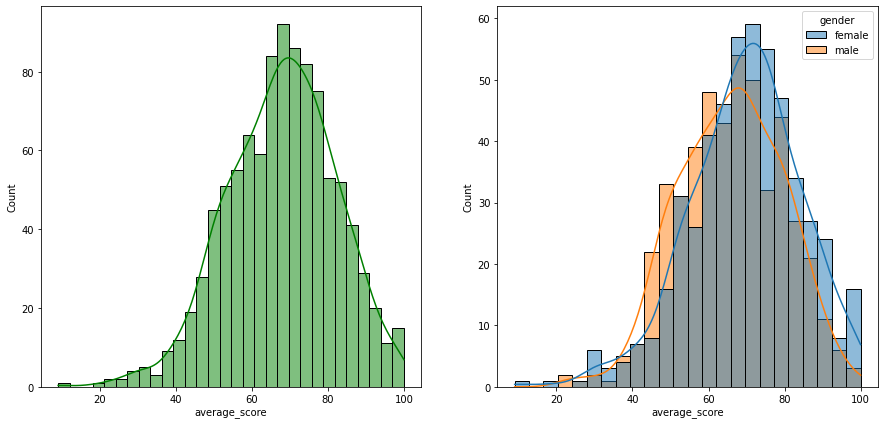

In [14]:
# Histogram and KDE 
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

Insights 
- Female students tend to perform well then male students. 

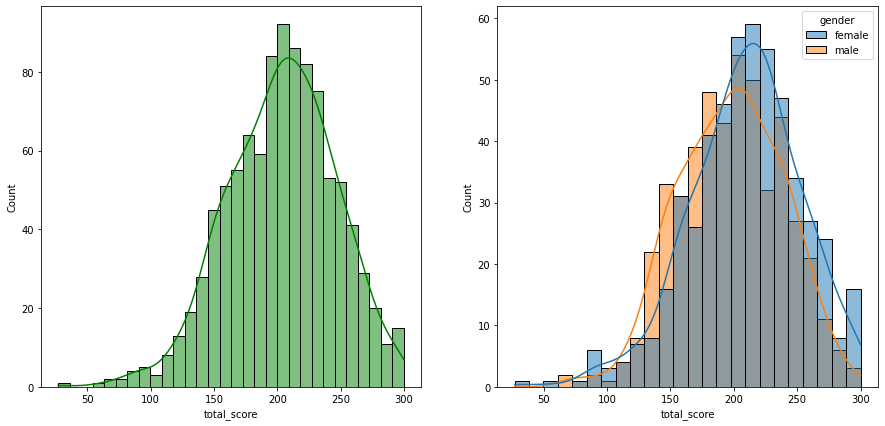

In [15]:
# Histogram and KDE 
fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insights 
- Female students tend to perform well than male students.

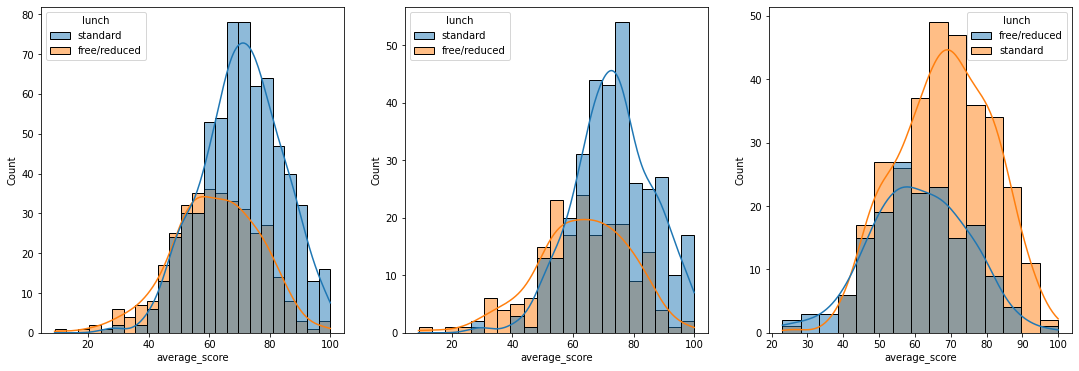

In [16]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'lunch')
plt.show()

### Insights
- Standard lunch helps perform in general 

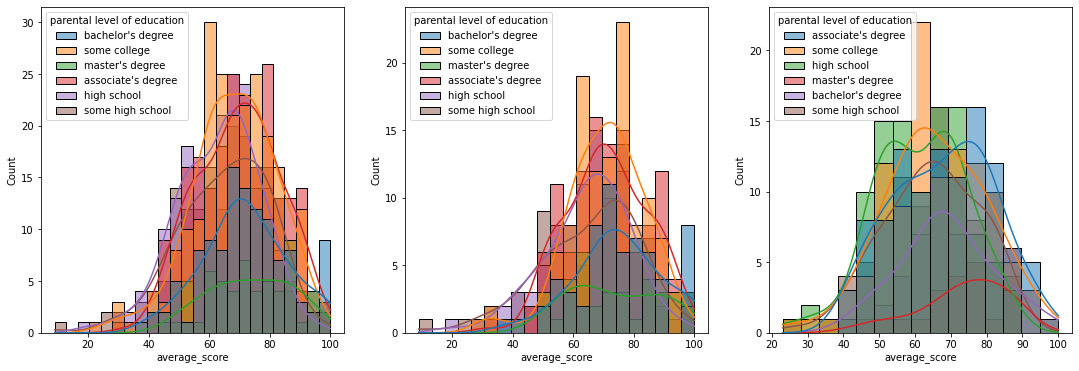

In [17]:
plt.subplots(1,3, figsize =(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'parental level of education')
plt.show()

### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

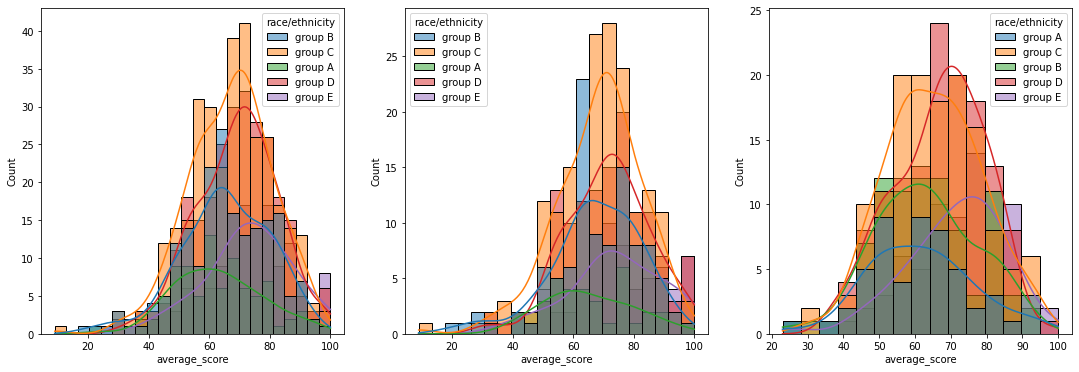

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race/ethnicity')
plt.show()

### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


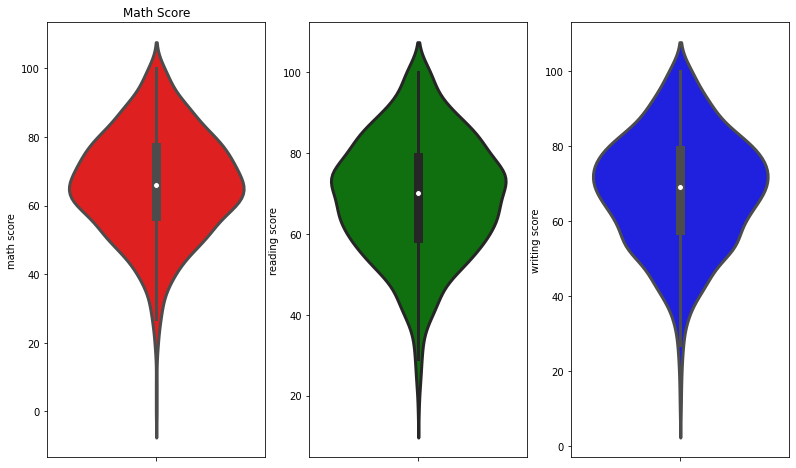

In [19]:
#### 4.2 Maximum score of students in all three subjects
plt.figure(figsize = (18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score', data = df, color = 'red', linewidth = 3)
plt.subplot(1,4,2)
sns.violinplot(y='reading score', data = df, color = 'green', linewidth = 3)
plt.subplot(1,4,3)
sns.violinplot(y='writing score', data = df, color = 'blue', linewidth = 3)
plt.show()

It is clear from the above plots that most of the students score in between 60-80 in maths and in reading and writing most of them score from 50-80

#### Multivariate analysis using pieplot

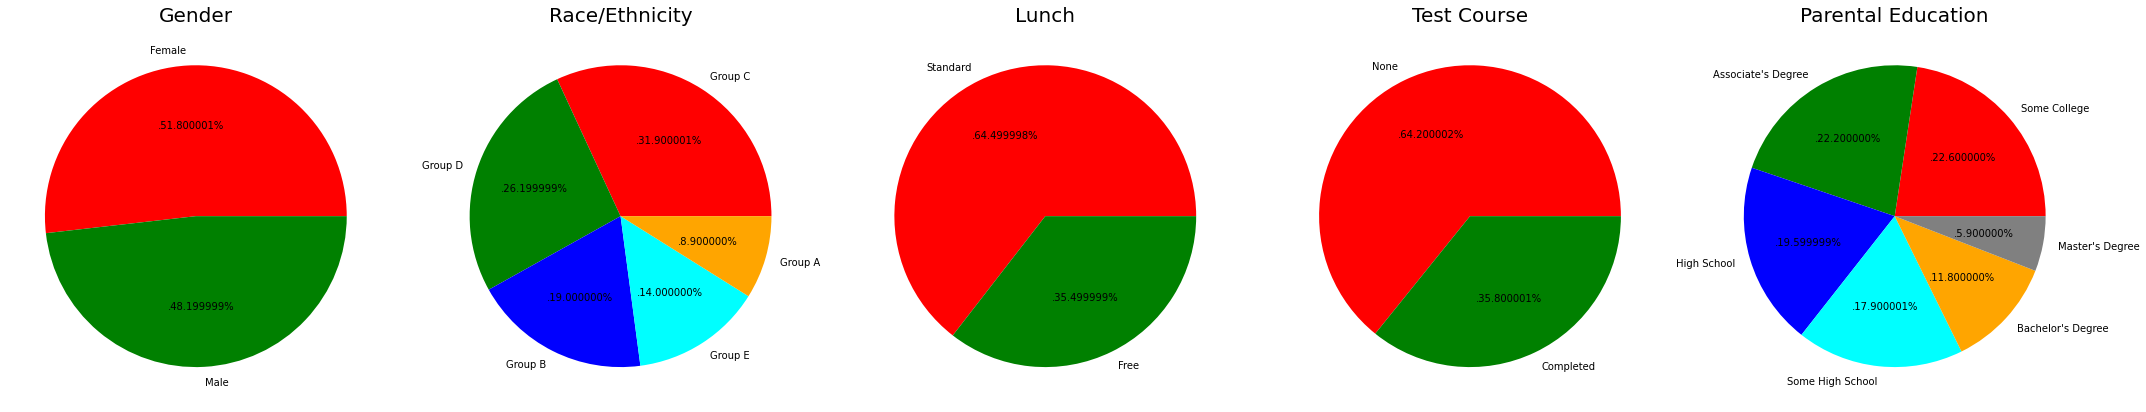

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- Number of Male and Female students are almost equal
- Number of students are greatest in Group C
- Number of students who opted for Standard Lunch are greatest. 
- Number of students who have enrolled into the test preparation course are the greatest. 
- Number of students whose parental education is 'Some College' is greater followed closely by "Associate Degree" Students. 

### Feature wise Visualization
#### Gender Column
- How is distribution of Gender
- Gender impact of student's performance

### Univariate Analysis

In [29]:
# f, ax = plt.subplots(1,2, figsize = (20,10))
# sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
# for container in ax[0].containers:
#     ax[0].bar_label(container, color = 'black', size = 20)

# plt.pie(x = df['gender'].value_counts(), labels = ['Male','Female'], explode = [0,0.1],autopct = '%1.1f%%',shadow = True, colors = ['#ff4d4d','#ff8000'])
# plt.show()

#### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### Bivariate Analysis (Is gender has any impact on student's performance)

In [22]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


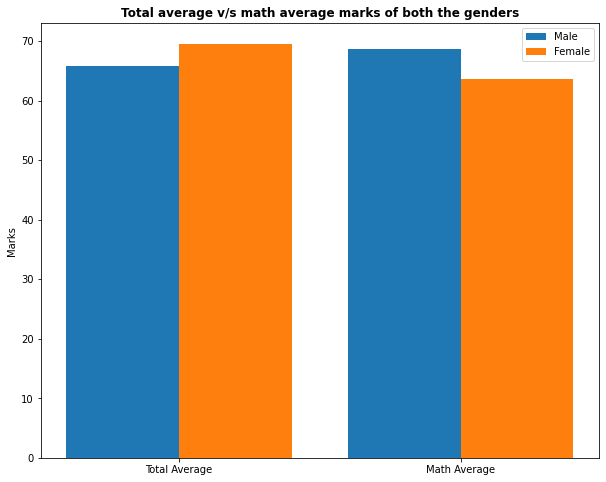

In [25]:
plt.figure(figsize = (10,8))
X = ['Total Average','Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis-0.2, male_scores, 0.4, label = 'Male',)
plt.bar(X_axis+0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('Marks')
plt.title('Total average v/s math average marks of both the genders', fontweight = 'bold')
plt.legend()
plt.show()

#### Insights 
- On an average female students have a better Total score than male students 
- Males have scored higher in maths

#### 4.4.2 Race/Ethnicity Column
- How is the group wise distribution?
- Race/Ethnicity have an impact on the student's performance?

### Univariate Analysis (How is Group wise distribution?)

In [28]:
# f,ax = plt.subplots(1,2,figsize = (20,10))
# sns.countplot(x=df['race/ethnicity'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
# for container in ax[0].containers:
#     ax[0].bar_label(container, color = 'black', size =20)
# plt.pie(x = df['race/ethnicity'].value_counts(), labels = df['race/ethnicity'].value_counts().index, explode = [0.1,0,0,0,0], autopct = '%1.1f%%')
# plt.show()


#### Insights 
- Most of the students belonging from group C/group D.
- Lowest number of students belong to group A

### Bivariate Analysis (Is Race/Ethnicity has any impact on students's performance)

In [33]:
# Group_data2 = df.groupby('race/ethnicity')
# f,ax = plt.subplots(1,3,figsize = (20,8))
# sns.barplot(x = Group_data2['math score'].mean().index, y = Group_data2['math score'].mean().values, palette = 'mako',ax = ax[0])
# ax[0].set_title('Math score',color = '#005ce6', size = 20)

# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=15)

# sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
# ax[1].set_title('Reading score',color='#005ce6',size=20)

# for container in ax[1].containers:
#     ax[1].bar_label(container,color='black',size=15)

# sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
# ax[2].set_title('Writing score',color='#005ce6',size=20)

# for container in ax[2].containers:
#     ax[2].bar_label(container,color='black',size=15)